1. Importer les librairies necessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Charger le jeu des donnees dans pandas

In [2]:
data = pd.read_csv('iris.csv')

3. Resumer les donnees

In [3]:
print(data.shape)
print(data.head())
print(data.describe())
print(data['species'].value_counts())

(150, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
species
setosa        50
versicolor    50
virginica     50
Name: co

4. visualiser les donnees

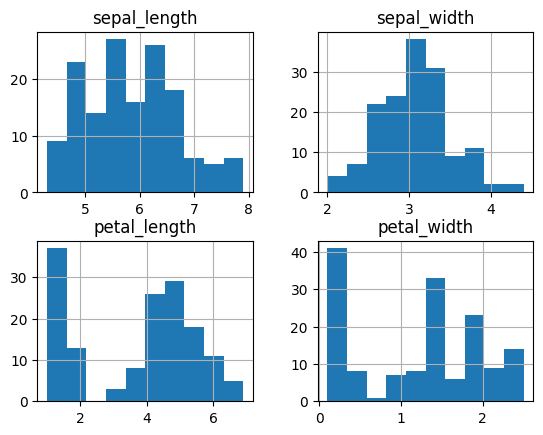

In [4]:
data.hist()
plt.show()



Evaluer certains algorithm

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# charger Iris directement
iris = load_iris()

# Séparer les entités (X) et les étiquettes cibles (y)
X = iris.data
y = iris.target

# Diviser les données en ensembles d’entraînement et de test (70 % d’entraînement, 30 % de test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Définir différents modèles de classification
models = []
models.append(("Logistic Regression", LogisticRegression(multi_class="ovr", solver="lbfgs")))
models.append(("KNN", KNeighborsClassifier(n_neighbors=5)))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("SVM", SVC(kernel="linear")))

# Évaluez chaque modèle et imprimez les résultats
for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{name} Précision: {accuracy:.4f}")

# Sélectionnez le modèle le plus performant en fonction de sa précision
Nom_M_M, meilleur_model = models[0]
Meilleur_score = accuracy_score(y_test, models[0][1].predict(X_test))
for name, model in models[1:]:
  accuracy = accuracy_score(y_test, model.predict(X_test))
  if accuracy > Meilleur_score:
    Nom_M_M, meilleur_model = name, model
    Meilleur_score = accuracy

print(f"\nMeilleur modèle: {Nom_M_M} avec précision: {Meilleur_score:.4f}")

Logistic Regression Précision: 0.9556
KNN Précision: 1.0000
Decision Tree Précision: 1.0000
SVM Précision: 1.0000

Meilleur modèle: KNN avec précision: 1.0000
